# 1. Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

# 2. Importing Data

In [4]:
# Importing data set zomato_cleaned.csv
df_zomato_cleaned = pd.read_csv(r'/Users/.../Documents/Zomato Analysis/02 - Data/Prepared Data/zomato_cleaned.csv', index_col = False)

In [5]:
df_zomato_cleaned

Unnamed: 0                                                url  \
0               0  https://www.zomato.com/bangalore/jalsa-banasha...   
1               1  https://www.zomato.com/bangalore/spice-elephan...   
2               2  https://www.zomato.com/SanchurroBangalore?cont...   
3               3  https://www.zomato.com/bangalore/addhuri-udupi...   
4               4  https://www.zomato.com/bangalore/grand-village...   
...           ...                                                ...   
51143       51712  https://www.zomato.com/bangalore/best-brews-fo...   
51144       51713  https://www.zomato.com/bangalore/vinod-bar-and...   
51145       51714  https://www.zomato.com/bangalore/plunge-sherat...   
51146       51715  https://www.zomato.com/bangalore/chime-sherato...   
51147       51716  https://www.zomato.com/bangalore/the-nest-the-...   

                                                 address  \
0      942, 21st Main Road, 2nd Stage, Banashankari, ...   
1      2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...   
2      1112, Next to KIMS Medical College, 17th Cross...   
3      1st Floor, Annakuteera, 3rd Stage, Banashankar...   
4      10, 3rd Floor, Lakshmi Associates, Gandhi Baza...   
...                                                  ...   
51143  Four Points by Sheraton Bengaluru, 43/3, White...   
51144  Number 10, Garudachar Palya, Mahadevapura, Whi...   
51145  Sheraton Grand Bengaluru Whitefield Hotel & Co...   
51146  Sheraton Grand Bengaluru Whitefield Hotel & Co...   
51147  ITPL Main Road, KIADB Export Promotion Industr...   

                                                    name online_order  \
0                                                  Jalsa          Yes   
1                                         Spice Elephant          Yes   
2                                        San Churro Cafe          Yes   
3                                  Addhuri Udupi Bhojana           No   
4                                          Grand Village           No   
...                                                  ...          ...   
51143  Best Brews - Four Points by Sheraton Bengaluru...           No   
51144                           Vinod Bar And Restaurant           No   
51145  Plunge - Sheraton Grand Bengaluru Whitefield H...           No   
51146  Chime - Sheraton Grand Bengaluru Whitefield Ho...           No   
51147                       The Nest - The Den Bengaluru           No   

      book_table    rate  votes                    location  \
0            Yes   4.1/5    775                Banashankari   
1             No   4.1/5    787                Banashankari   
2             No   3.8/5    918                Banashankari   
3             No   3.7/5     88                Banashankari   
4             No   3.8/5    166                Basavanagudi   
...          ...     ...    ...                         ...   
51143         No  3.6 /5     27                  Whitefield   
51144         No     NaN      0                  Whitefield   
51145         No     NaN      0                  Whitefield   
51146        Yes  4.3 /5    236  ITPL Main Road, Whitefield   
51147         No  3.4 /5     13  ITPL Main Road, Whitefield   

                 rest_type                                         dish_liked  \
0            Casual Dining  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1            Casual Dining  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2      Cafe, Casual Dining  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3              Quick Bites                                        Masala Dosa   
4            Casual Dining                                Panipuri, Gol Gappe   
...                    ...                                                ...   
51143                  Bar                                                NaN   
51144                  Bar                                                NaN   
51145                  Bar                                

# 3. Wrangling Data

In [7]:
# create new data frame with the following columns: 
# rate_float, votes, approx_cost_2ppl, location, listed_in_city, listed_as_type, rest_type, cuisines, book_table, online_order

df_zomato_finalanalysis = df_zomato_cleaned[
    [
        "rate_float",
        "votes",
        "approx_cost_2ppl",
        "location",
        "listed_in_city",
        "rest_type",
        "listed_as_type",
        "cuisines",
        "book_table",
        "online_order",
        "reviews_list",
    ]
].copy()

In [8]:
df_zomato_finalanalysis

rate_float  votes  approx_cost_2ppl                    location  \
0        4.100000    775               800                Banashankari   
1        4.100000    787               800                Banashankari   
2        3.800000    918               800                Banashankari   
3        3.700000     88               300                Banashankari   
4        3.800000    166               600                Basavanagudi   
...           ...    ...               ...                         ...   
51143    3.600000     27              1500                  Whitefield   
51144    3.700449      0               600                  Whitefield   
51145    3.700449      0              2000                  Whitefield   
51146    4.300000    236              2500  ITPL Main Road, Whitefield   
51147    3.400000     13              1500  ITPL Main Road, Whitefield   

      listed_in_city            rest_type listed_as_type  \
0       Banashankari        Casual Dining         Buffet   
1       Banashankari        Casual Dining         Buffet   
2       Banashankari  Cafe, Casual Dining         Buffet   
3       Banashankari          Quick Bites         Buffet   
4       Banashankari        Casual Dining         Buffet   
...              ...                  ...            ...   
51143     Whitefield                  Bar  Pubs and bars   
51144     Whitefield                  Bar  Pubs and bars   
51145     Whitefield                  Bar  Pubs and bars   
51146     Whitefield                  Bar  Pubs and bars   
51147     Whitefield   Bar, Casual Dining  Pubs and bars   

                                     cuisines book_table online_order  \
0              North Indian, Mughlai, Chinese        Yes          Yes   
1                 Chinese, North Indian, Thai         No          Yes   
2                      Cafe, Mexican, Italian         No          Yes   
3                  South Indian, North Indian         No           No   
4                    North Indian, Rajasthani         No           No   
...                                       ...        ...          ...   
51143                             Continental         No           No   
51144                             Finger Food         No           No   
51145                             Finger Food         No           No   
51146                             Finger Food        Yes           No   
51147  Finger Food, North Indian, Continental         No           No   

                                            reviews_list  
0      [('Rated 4.0', 'RATED\n  A beautiful place to ...  
1      [('Rated 4.0', 'RATED\n  Had been here for din...  
2      [('Rated 3.0', "RATED\n  Ambience is not that ...  
3      [('Rated 4.0', "RATED\n  Great food and proper...  
4      [('Rated 4.0', 'RATED\n  Very good restaurant ...  
...                                                  ...  
51143  [('Rated 5.0', "RATED\n  Food and service are ...  
51144                                                 []  
51145                                                 []  
51146  [('Rated 4.0', 'RATED\n  Nice and friendly pla...  
51147  [('Rated 5.0', 'RATED\n  Great ambience , look...  

[51148 rows x 11 columns]

In [9]:
# rename column rate_float
df_zomato_finalanalysis.rename(columns={"rate_float": "rate"}, inplace=True)

In [10]:
# Round values in the 'rate' column to 1 decimal place
df_zomato_finalanalysis['rate'] = df_zomato_finalanalysis['rate'].round(1)

### Calculate a popularity score by combining ratings (rate) and votes (votes) using a weighted formula:
\text{popularity_score} = \left(\frac{\text{rate} \times \text{votes}}{\text{max votes}}\right) \times 10

**Where:**

- rate: The restaurant's rating.
- votes: The number of people who rated the restaurant.
- max votes: The highest number of votes received by any restaurant in the dataset (for normalization).
- 10: A scaling factor to make scores more interpretable.

In [12]:
# Define the multiplier (adjust as needed)
multiplier = 10  

# Compute popularity_score with conditional logic
df_zomato_finalanalysis["popularity_score"] = df_zomato_finalanalysis.apply(
    lambda row: row["rate"] * multiplier if row["votes"] == 0 else row["rate"] * row["votes"] * multiplier,
    axis=1
)

# Calculate min, max, and median of popularity_score
min_score = df_zomato_finalanalysis["popularity_score"].min()
max_score = df_zomato_finalanalysis["popularity_score"].max()
median_score = df_zomato_finalanalysis["popularity_score"].median()

# Print the results
print(f"Minimum Popularity Score: {min_score}")
print(f"Maximum Popularity Score: {max_score}")
print(f"Median Popularity Score: {median_score}")


Minimum Popularity Score: 32.0
Maximum Popularity Score: 824768.0
Median Popularity Score: 1460.0


In [13]:
# Selecting only numeric columns for statistical analysis
numeric_columns = df_zomato_finalanalysis.select_dtypes(include=['number'])

# Calculating descriptive statistics
summary_stats = numeric_columns.agg(['count', 'mean', 'median', 'std', 'min', 'max'])

# Display the result
print(summary_stats)

                rate         votes  approx_cost_2ppl  popularity_score
count   51148.000000  51148.000000      51148.000000      51148.000000
mean        3.701623    284.917885        556.043736      11920.798936
median      3.700000     41.000000        400.000000       1460.000000
std         0.395188    806.495210        439.555299      36068.337918
min         1.800000      0.000000         40.000000         32.000000
max         4.900000  16832.000000       6000.000000     824768.000000


In [14]:
df_zomato_finalanalysis

rate  votes  approx_cost_2ppl                    location  \
0       4.1    775               800                Banashankari   
1       4.1    787               800                Banashankari   
2       3.8    918               800                Banashankari   
3       3.7     88               300                Banashankari   
4       3.8    166               600                Basavanagudi   
...     ...    ...               ...                         ...   
51143   3.6     27              1500                  Whitefield   
51144   3.7      0               600                  Whitefield   
51145   3.7      0              2000                  Whitefield   
51146   4.3    236              2500  ITPL Main Road, Whitefield   
51147   3.4     13              1500  ITPL Main Road, Whitefield   

      listed_in_city            rest_type listed_as_type  \
0       Banashankari        Casual Dining         Buffet   
1       Banashankari        Casual Dining         Buffet   
2       Banashankari  Cafe, Casual Dining         Buffet   
3       Banashankari          Quick Bites         Buffet   
4       Banashankari        Casual Dining         Buffet   
...              ...                  ...            ...   
51143     Whitefield                  Bar  Pubs and bars   
51144     Whitefield                  Bar  Pubs and bars   
51145     Whitefield                  Bar  Pubs and bars   
51146     Whitefield                  Bar  Pubs and bars   
51147     Whitefield   Bar, Casual Dining  Pubs and bars   

                                     cuisines book_table online_order  \
0              North Indian, Mughlai, Chinese        Yes          Yes   
1                 Chinese, North Indian, Thai         No          Yes   
2                      Cafe, Mexican, Italian         No          Yes   
3                  South Indian, North Indian         No           No   
4                    North Indian, Rajasthani         No           No   
...                                       ...        ...          ...   
51143                             Continental         No           No   
51144                             Finger Food         No           No   
51145                             Finger Food         No           No   
51146                             Finger Food        Yes           No   
51147  Finger Food, North Indian, Continental         No           No   

                                            reviews_list  popularity_score  
0      [('Rated 4.0', 'RATED\n  A beautiful place to ...           31775.0  
1      [('Rated 4.0', 'RATED\n  Had been here for din...           32267.0  
2      [('Rated 3.0', "RATED\n  Ambience is not that ...           34884.0  
3      [('Rated 4.0', "RATED\n  Great food and proper...            3256.0  
4      [('Rated 4.0', 'RATED\n  Very good restaurant ...            6308.0  
...                                                  ...               ...  
51143  [('Rated 5.0', "RATED\n  Food and service are ...             972.0  
51144                                                 []              37.0  
51145                                                 []              37.0  
51146  [('Rated 4.0', 'RATED\n  Nice and friendly pla...           10148.0  
51147  [('Rated 5.0', 'RATED\n  Great ambience , look...             442.0  

[51148 rows x 12 columns]

In [15]:
# save out subset for later
df_zomato_finalanalysis.to_csv(os.path.join(r'/Users/.../Documents/Zomato Analysis/02 - Data/Prepared Data/zomato_finalanalysis.csv'))

In [16]:
df_zomato_finalanalysis.shape

(51148, 12)

# 4. Free Text Analysis - Sentiment & Topics

In [18]:
# Install and Import Required Libraries

import re
import nltk
import spacy
from textblob import TextBlob
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords
nltk.download('stopwords')

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Set stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/.../nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
# Clean the "reviews_list" Column
# Remove special characters and numbers
# Tokenize and remove stopwords

def clean_text(text):
    if isinstance(text, str):
        text = re.sub(r'\d+', '', text)  # Remove numbers
        text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
        text = text.lower()  # Convert to lowercase
        text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
        return text
    return ""

df_zomato_finalanalysis['clean_reviews'] = df_zomato_finalanalysis['reviews_list'].apply(clean_text)


In [20]:
df_zomato_finalanalysis

rate  votes  approx_cost_2ppl                    location  \
0       4.1    775               800                Banashankari   
1       4.1    787               800                Banashankari   
2       3.8    918               800                Banashankari   
3       3.7     88               300                Banashankari   
4       3.8    166               600                Basavanagudi   
...     ...    ...               ...                         ...   
51143   3.6     27              1500                  Whitefield   
51144   3.7      0               600                  Whitefield   
51145   3.7      0              2000                  Whitefield   
51146   4.3    236              2500  ITPL Main Road, Whitefield   
51147   3.4     13              1500  ITPL Main Road, Whitefield   

      listed_in_city            rest_type listed_as_type  \
0       Banashankari        Casual Dining         Buffet   
1       Banashankari        Casual Dining         Buffet   
2       Banashankari  Cafe, Casual Dining         Buffet   
3       Banashankari          Quick Bites         Buffet   
4       Banashankari        Casual Dining         Buffet   
...              ...                  ...            ...   
51143     Whitefield                  Bar  Pubs and bars   
51144     Whitefield                  Bar  Pubs and bars   
51145     Whitefield                  Bar  Pubs and bars   
51146     Whitefield                  Bar  Pubs and bars   
51147     Whitefield   Bar, Casual Dining  Pubs and bars   

                                     cuisines book_table online_order  \
0              North Indian, Mughlai, Chinese        Yes          Yes   
1                 Chinese, North Indian, Thai         No          Yes   
2                      Cafe, Mexican, Italian         No          Yes   
3                  South Indian, North Indian         No           No   
4                    North Indian, Rajasthani         No           No   
...                                       ...        ...          ...   
51143                             Continental         No           No   
51144                             Finger Food         No           No   
51145                             Finger Food         No           No   
51146                             Finger Food        Yes           No   
51147  Finger Food, North Indian, Continental         No           No   

                                            reviews_list  popularity_score  \
0      [('Rated 4.0', 'RATED\n  A beautiful place to ...           31775.0   
1      [('Rated 4.0', 'RATED\n  Had been here for din...           32267.0   
2      [('Rated 3.0', "RATED\n  Ambience is not that ...           34884.0   
3      [('Rated 4.0', "RATED\n  Great food and proper...            3256.0   
4      [('Rated 4.0', 'RATED\n  Very good restaurant ...            6308.0   
...                                                  ...               ...   
51143  [('Rated 5.0', "RATED\n  Food and service are ...             972.0   
51144                                                 []              37.0   
51145                                                 []              37.0   
51146  [('Rated 4.0', 'RATED\n  Nice and friendly pla...           10148.0   
51147  [('Rated 5.0', 'RATED\n  Great ambience , look...             442.0   

                                           clean_reviews  
0      rated ratedn beautiful place dine inthe interi...  
1      rated ratedn dinner family turned good choose ...  
2      rated ratedn ambience good enough pocket frien...  
3      rated ratedn great food proper karnataka style...  
4      rated ratedn good restaurant neighbourhood buf...  
...                                                  ...  
51143  rated ratedn food service incomparably excelle...  
51144                                                     
51145                                                     
51146  rated ratedn nice friendly place staff awesome...  
51147 

In [21]:
# remove the substrings "rated" and "ratedn" from the values in the column "clean_reviews"
df_zomato_finalanalysis['clean_reviews'] = df_zomato_finalanalysis['clean_reviews'].str.replace('ratedn', '', case=False).str.replace('rated', '', case=False)

In [22]:
df_zomato_finalanalysis

rate  votes  approx_cost_2ppl                    location  \
0       4.1    775               800                Banashankari   
1       4.1    787               800                Banashankari   
2       3.8    918               800                Banashankari   
3       3.7     88               300                Banashankari   
4       3.8    166               600                Basavanagudi   
...     ...    ...               ...                         ...   
51143   3.6     27              1500                  Whitefield   
51144   3.7      0               600                  Whitefield   
51145   3.7      0              2000                  Whitefield   
51146   4.3    236              2500  ITPL Main Road, Whitefield   
51147   3.4     13              1500  ITPL Main Road, Whitefield   

      listed_in_city            rest_type listed_as_type  \
0       Banashankari        Casual Dining         Buffet   
1       Banashankari        Casual Dining         Buffet   
2       Banashankari  Cafe, Casual Dining         Buffet   
3       Banashankari          Quick Bites         Buffet   
4       Banashankari        Casual Dining         Buffet   
...              ...                  ...            ...   
51143     Whitefield                  Bar  Pubs and bars   
51144     Whitefield                  Bar  Pubs and bars   
51145     Whitefield                  Bar  Pubs and bars   
51146     Whitefield                  Bar  Pubs and bars   
51147     Whitefield   Bar, Casual Dining  Pubs and bars   

                                     cuisines book_table online_order  \
0              North Indian, Mughlai, Chinese        Yes          Yes   
1                 Chinese, North Indian, Thai         No          Yes   
2                      Cafe, Mexican, Italian         No          Yes   
3                  South Indian, North Indian         No           No   
4                    North Indian, Rajasthani         No           No   
...                                       ...        ...          ...   
51143                             Continental         No           No   
51144                             Finger Food         No           No   
51145                             Finger Food         No           No   
51146                             Finger Food        Yes           No   
51147  Finger Food, North Indian, Continental         No           No   

                                            reviews_list  popularity_score  \
0      [('Rated 4.0', 'RATED\n  A beautiful place to ...           31775.0   
1      [('Rated 4.0', 'RATED\n  Had been here for din...           32267.0   
2      [('Rated 3.0', "RATED\n  Ambience is not that ...           34884.0   
3      [('Rated 4.0', "RATED\n  Great food and proper...            3256.0   
4      [('Rated 4.0', 'RATED\n  Very good restaurant ...            6308.0   
...                                                  ...               ...   
51143  [('Rated 5.0', "RATED\n  Food and service are ...             972.0   
51144                                                 []              37.0   
51145                                                 []              37.0   
51146  [('Rated 4.0', 'RATED\n  Nice and friendly pla...           10148.0   
51147  [('Rated 5.0', 'RATED\n  Great ambience , look...             442.0   

                                           clean_reviews  
0        beautiful place dine inthe interiors take ba...  
1        dinner family turned good choose suitable ag...  
2        ambience good enough pocket friendly cafe qu...  
3        great food proper karnataka style full meals...  
4        good restaurant neighbourhood buffet system ...  
...                                                  ...  
51143    food service incomparably excellent service ...  
51144                                                     
51145                                                     
51146    nice friendly place staff awesome ansur kara...  
51147 

## 4.1 Sentiment Analysis

In [24]:
# Using TextBlob for Sentiment Analysis

from textblob import TextBlob

# Function to compute sentiment score
def get_sentiment(text):
    if isinstance(text, str):  # Ensure input is a string
        return TextBlob(text).sentiment.polarity  # Polarity: -1 (negative) to +1 (positive)
    return None  # Handle missing values gracefully

# Apply sentiment analysis to each review
df_zomato_finalanalysis['sentiment_score'] = df_zomato_finalanalysis['clean_reviews'].apply(get_sentiment)

# Display a summary
print(df_zomato_finalanalysis[['clean_reviews', 'sentiment_score']].head())


                                       clean_reviews  sentiment_score
0    beautiful place dine inthe interiors take ba...         0.350090
1    dinner family turned good choose suitable ag...         0.177794
2    ambience good enough pocket friendly cafe qu...         0.172369
3    great food proper karnataka style full meals...         0.262419
4    good restaurant neighbourhood buffet system ...         0.404720


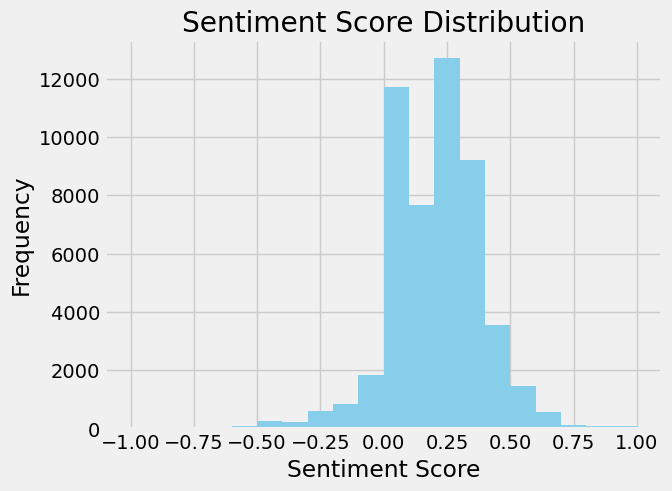

In [25]:
# Visualizing Sentiments
plt.hist(df_zomato_finalanalysis['sentiment_score'], bins=20, color='skyblue')
plt.title("Sentiment Score Distribution")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()


## **Interpretation**

visual representation of sentiment scores derived from reviews of restaurants in Bangalore

1. **Sentiment Score Range**:
   - The sentiment scores on the x-axis range from -1 to 1. This range indicates polarity, where -1 represents a completely negative sentiment, 0 denotes a neutral sentiment, and 1 signifies a completely positive sentiment.

2. **Distribution Shape**:
   - The histogram displays a distribution of scores, with bars showing the frequency of each score range.
   - Most of the sentiment scores seem to be clustered around the 0.25 mark, indicating an overall positive sentiment but not extremely positive.
   - There is a noticeable peak between 0 and 0.5, suggesting that many reviews have mildly positive sentiments.

3. **Frequency Insights**:
   - The y-axis represents the frequency of reviews falling within each sentiment score range.
   - The highest frequency is around the 0.25 score, where more than 12,000 reviews are represented.
   - This high frequency in positive scores suggests that many people have had generally positive experiences at restaurants in Bangalore.

4. **Neutral and Negative Sentiments**:
   - Scores approaching zero and extending slightly into the negative range are less frequent, implying fewer neutral or negative reviews.
   - Very few reviews seem to be strongly negative (approaching -1 in sentiment score), indicating that negative sentiments might be relatively rare.

**Summary:**
Overall, the sentiment analysis using TextBlob suggests that most restaurant reviews in Bangalore show mildly positive sentiments, with relatively few negative or neutral reviews. This can imply a generally satisfactory dining experience for most patrons in the area.

In [27]:
df_zomato_finalanalysis

rate  votes  approx_cost_2ppl                    location  \
0       4.1    775               800                Banashankari   
1       4.1    787               800                Banashankari   
2       3.8    918               800                Banashankari   
3       3.7     88               300                Banashankari   
4       3.8    166               600                Basavanagudi   
...     ...    ...               ...                         ...   
51143   3.6     27              1500                  Whitefield   
51144   3.7      0               600                  Whitefield   
51145   3.7      0              2000                  Whitefield   
51146   4.3    236              2500  ITPL Main Road, Whitefield   
51147   3.4     13              1500  ITPL Main Road, Whitefield   

      listed_in_city            rest_type listed_as_type  \
0       Banashankari        Casual Dining         Buffet   
1       Banashankari        Casual Dining         Buffet   
2       Banashankari  Cafe, Casual Dining         Buffet   
3       Banashankari          Quick Bites         Buffet   
4       Banashankari        Casual Dining         Buffet   
...              ...                  ...            ...   
51143     Whitefield                  Bar  Pubs and bars   
51144     Whitefield                  Bar  Pubs and bars   
51145     Whitefield                  Bar  Pubs and bars   
51146     Whitefield                  Bar  Pubs and bars   
51147     Whitefield   Bar, Casual Dining  Pubs and bars   

                                     cuisines book_table online_order  \
0              North Indian, Mughlai, Chinese        Yes          Yes   
1                 Chinese, North Indian, Thai         No          Yes   
2                      Cafe, Mexican, Italian         No          Yes   
3                  South Indian, North Indian         No           No   
4                    North Indian, Rajasthani         No           No   
...                                       ...        ...          ...   
51143                             Continental         No           No   
51144                             Finger Food         No           No   
51145                             Finger Food         No           No   
51146                             Finger Food        Yes           No   
51147  Finger Food, North Indian, Continental         No           No   

                                            reviews_list  popularity_score  \
0      [('Rated 4.0', 'RATED\n  A beautiful place to ...           31775.0   
1      [('Rated 4.0', 'RATED\n  Had been here for din...           32267.0   
2      [('Rated 3.0', "RATED\n  Ambience is not that ...           34884.0   
3      [('Rated 4.0', "RATED\n  Great food and proper...            3256.0   
4      [('Rated 4.0', 'RATED\n  Very good restaurant ...            6308.0   
...                                                  ...               ...   
51143  [('Rated 5.0', "RATED\n  Food and service are ...             972.0   
51144                                                 []              37.0   
51145                                                 []              37.0   
51146  [('Rated 4.0', 'RATED\n  Nice and friendly pla...           10148.0   
51147  [('Rated 5.0', 'RATED\n  Great ambience , look...             442.0   

                                           clean_reviews  sentiment_score  
0        beautiful place dine inthe interiors take ba...         0.350090  
1        dinner family turned good choose suitable ag...         0.177794  
2        ambience good enough pocket friendly cafe qu...         0.172369  
3        great food proper karnataka style full meals...         0.262419  
4        good restaurant neighbourhood buffet system ...         0.404720  
...                                                  ...              ...  
51143    food service incomparably excellent service ...         0.394217  
51144                                          

# 4.2 Topic Modeling with LDA (Latent Dirichlet Allocation)

In [29]:
# Convert Text to a Document-Term Matrix

vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(df_zomato_finalanalysis['clean_reviews'])


In [30]:
# Apply LDA for Topic Extraction

lda_model = LatentDirichletAllocation(n_components=5, random_state=42)  # 5 topics
lda_model.fit(X)

# Display top words in each topic
words = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda_model.components_):
    print(f"Topic {topic_idx + 1}:")
    print(" ".join([words[i] for i in topic.argsort()[:-10 - 1:-1]]))
    print("\n")


Topic 1:
place good food pizza ambience service chicken great really nice


Topic 2:
place ice good cream tea chocolate coffee sandwich sweets try


Topic 3:
cake cakes chocolate place velvet pastries good ordered red birthday


Topic 4:
chicken food biryani good ordered taste order rice place delivery


Topic 5:
food good place dosa indian restaurant chicken taste service try




### **Apply Topic Modeling (LDA)**

Use Latent Dirichlet Allocation (LDA) to extract topics from the reviews_list column. LDA identifies topics as groups of words that frequently appear together.

- Identify the most discussed topics.
- Rank them by frequency.
- Visualize topic distributions.

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
from gensim import corpora
from gensim.models import LdaModel
import pandas as pd

# Load reviews
reviews = df_zomato_finalanalysis['clean_reviews'].dropna().tolist()

# Vectorize the text
vectorizer = CountVectorizer(stop_words='english')
doc_term_matrix = vectorizer.fit_transform(reviews)

# Create dictionary & corpus for LDA
dictionary = corpora.Dictionary([text.split() for text in reviews])
corpus = [dictionary.doc2bow(text.split()) for text in reviews]

# Train LDA model (e.g., extract 5 topics)
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, passes=10)

# Print topics with word distributions
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)


(0, '0.037*"food" + 0.030*"good" + 0.019*"chicken" + 0.014*"ordered" + 0.012*"taste"')
(1, '0.023*"place" + 0.014*"good" + 0.011*"pizza" + 0.010*"chocolate" + 0.008*"cake"')
(2, '0.026*"place" + 0.024*"food" + 0.022*"good" + 0.009*"taste" + 0.009*"biryani"')
(3, '0.023*"place" + 0.022*"food" + 0.018*"good" + 0.012*"chicken" + 0.010*"service"')
(4, '0.037*"place" + 0.028*"good" + 0.023*"food" + 0.012*"ambience" + 0.011*"great"')


In [33]:
# Count Topic Frequency

from collections import Counter

# Assign topics to reviews
topic_counts = Counter()
for doc in corpus:
    topic_id = max(lda_model.get_document_topics(doc), key=lambda x: x[1])[0]  # Get the dominant topic
    topic_counts[topic_id] += 1

# Convert to DataFrame for ranking
topic_ranking = pd.DataFrame(topic_counts.items(), columns=['Topic', 'Frequency'])
topic_ranking = topic_ranking.sort_values(by='Frequency', ascending=False)

print(topic_ranking)


   Topic  Frequency
3      0      19698
2      2      12608
1      1       9023
4      4       5199
0      3       4620


In [34]:
# Visualize the Topics

import pyLDAvis
import pyLDAvis.gensim_models as gensimvis  # Updated import for latest versions

pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, dictionary)
vis



/Users/.../Desktop/.../_Training_Learning/_DATA_ANALYST/_Anaconda/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=30004) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/Users/.../Desktop/.../_Training_Learning/_DATA_ANALYST/_Anaconda/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=30004) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/Users/.../Desktop/.../_Training_Learning/_DATA_ANALYST/_Anaconda/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=30004) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/Users/.../Desktop/.../_Training_Learning/_DATA_ANALYST/_Anaconda/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.054536 -0.072370       1        1  27.471667
0      0.129160  0.015249       2        1  19.895822
3     -0.048291 -0.069989       3        1  18.985086
1     -0.100624  0.107134       4        1  17.065810
2      0.074291  0.019977       5        1  16.581616, topic_info=           Term           Freq          Total Category  logprob  loglift
70         food  856553.000000  856553.000000  Default  30.0000  30.0000
209     biryani  121831.000000  121831.000000  Default  29.0000  29.0000
639       pizza  123407.000000  123407.000000  Default  28.0000  28.0000
222   chocolate   71944.000000   71944.000000  Default  27.0000  27.0000
1633   delivery   70405.000000   70405.000000  Default  26.0000  26.0000
...         ...            ...            ...      ...      ...      ...
269         get   22947.790334  107745.533182   Topic5  -5.6261   0.2503
10     ambience   25381.414973  248296.536442   Topic5  -5.5254  -0.4837
404       tried   23045.785177  118349.705688   Topic5  -5.6219   0.1607
124     ordered   25318.428458  295809.045212   Topic5  -5.5278  -0.6613
193       would   22500.131936  143293.212634   Topic5  -5.6458  -0.0545

[483 rows x 6 columns], token_table=       Topic      Freq   Term
term                         
15855      3  0.998195    abs
7097       5  0.999725   akki
6          1  0.269118   also
6          2  0.197612   also
6          3  0.176985   also
...      ...       ...    ...
193        2  0.190798  would
193        3  0.220911  would
193        4  0.170189  would
193        5  0.157021  would
60872      3  0.998527   zaks

[943 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 1, 4, 2, 3])

### **Observation**

Unfortunately the result shows topics that aren't insights, e.g.:
the
a
is
with
and
to
for
of
place
in
food
I
are
this
you
was
try
their

### **Suggestions**

1. **Preprocess Text Better:**
- Remove additional text noise, such as numbers, punctuation, and extra whitespace.
- Use more advanced stop word removal and consider lemmatization.

2. **Increase the Number of Topics and Passes:**
- Trial with different numbers of topics to find the optimal number for your dataset.
- Increase the number of passes in the LDA algorithm for better convergence.

3. **Use NLTK or SpaCy for Preprocessing:**
- NLTK or SpaCy can provide better tokenization and stop word filtering.
- They can also offer lemmatization, which could improve the model's performance.


from sklearn.feature_extraction.text import CountVectorizer
from gensim import corpora
from gensim.models import LdaModel
import pandas as pd
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import string
import pyLDAvis
import pyLDAvis.gensim as gensimvis

# Load spaCy language model
nlp = spacy.load('en_core_web_sm')

# Preprocess function to clean text
def preprocess_text(text):
    if not isinstance(text, str):  # Ensure the input is a string
        return ""
    
    # Convert to lowercase
    text = text.lower()
    
    # Tokenize the text
    doc = nlp(text)
    
    # Remove stop words, punctuation, and numbers
    tokens = [
        token.lemma_ for token in doc 
        if token.text not in STOP_WORDS and token.is_alpha and token.text not in string.punctuation
    ]
    
    return ' '.join(tokens)

# Ensure df_zomato_finalanalysis exists
if 'df_zomato_finalanalysis' not in globals():
    raise NameError("The DataFrame 'df_zomato_finalanalysis' is not defined.")

# Load the reviews and drop NaN values
reviews = df_zomato_finalanalysis['clean_reviews'].dropna().tolist()

# Preprocess all reviews
processed_reviews = [preprocess_text(review) for review in reviews]

# Ensure we have data to process
if len(processed_reviews) == 0:
    raise ValueError("No valid reviews found after preprocessing.")

# Vectorize the text
vectorizer = CountVectorizer()
doc_term_matrix = vectorizer.fit_transform(processed_reviews)

# Create dictionary & corpus for LDA
dictionary = corpora.Dictionary([text.split() for text in processed_reviews])
corpus = [dictionary.doc2bow(text.split()) for text in processed_reviews]

# Train LDA model (e.g., extract more topics)
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=7, passes=20)

# Print topics with word distributions
topics = lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)  # Ensure print is correctly indented

# Visualize the Topics
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, dictionary)
vis


In [69]:
from sklearn.feature_extraction.text import CountVectorizer
from gensim import corpora
from gensim.models import LdaModel
import pandas as pd
import spacy
import string
import pyLDAvis
import pyLDAvis.gensim as gensimvis

# Load spaCy language model
nlp = spacy.load('en_core_web_sm', disable=["ner", "parser"])  # Disable unnecessary components

# Optimized Preprocessing Function
def preprocess_texts(texts):
    """Processes a list of text entries efficiently using spaCy's nlp.pipe()."""
    processed_texts = []
    for doc in nlp.pipe(texts, batch_size=50):  # Process in batches
        tokens = [
            token.lemma_ for token in doc 
            if token.is_alpha and not token.is_stop and token.text not in string.punctuation
        ]
        processed_texts.append(" ".join(tokens))
    return processed_texts

# Ensure df_zomato_finalanalysis exists
if 'df_zomato_finalanalysis' not in globals():
    raise NameError("The DataFrame 'df_zomato_finalanalysis' is not defined.")

# Load and preprocess reviews
reviews = df_zomato_finalanalysis['clean_reviews'].dropna().tolist()
processed_reviews = preprocess_texts(reviews)

# Ensure we have data to process
if not processed_reviews:
    raise ValueError("No valid reviews found after preprocessing.")

# Vectorize text
vectorizer = CountVectorizer()
doc_term_matrix = vectorizer.fit_transform(processed_reviews)

# Create Dictionary & Corpus for LDA
dictionary = corpora.Dictionary(text.split() for text in processed_reviews)
corpus = [dictionary.doc2bow(text.split()) for text in processed_reviews]

# Train LDA model with optimized parameters
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=7, passes=10, chunksize=500)

# Print topics with word distributions
for topic in lda_model.print_topics(num_words=10):
    print(topic)

# Visualize the Topics
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, dictionary)
vis


(0, '0.031*"place" + 0.027*"good" + 0.024*"pizza" + 0.019*"food" + 0.014*"burger" + 0.013*"order" + 0.013*"chicken" + 0.012*"try" + 0.011*"pasta" + 0.010*"cheese"')
(1, '0.047*"place" + 0.037*"good" + 0.025*"food" + 0.016*"beer" + 0.015*"ambience" + 0.015*"great" + 0.013*"service" + 0.013*"drink" + 0.011*"visit" + 0.010*"music"')
(2, '0.024*"food" + 0.021*"place" + 0.018*"good" + 0.014*"noodle" + 0.013*"chicken" + 0.012*"try" + 0.011*"order" + 0.011*"rice" + 0.009*"dish" + 0.008*"taste"')
(3, '0.027*"place" + 0.025*"cake" + 0.021*"good" + 0.018*"chocolate" + 0.018*"try" + 0.013*"cream" + 0.013*"ice" + 0.012*"love" + 0.011*"order" + 0.010*"taste"')
(4, '0.041*"food" + 0.039*"good" + 0.032*"order" + 0.027*"chicken" + 0.020*"taste" + 0.016*"biryani" + 0.015*"place" + 0.013*"bad" + 0.013*"not" + 0.012*"time"')
(5, '0.031*"place" + 0.028*"food" + 0.027*"good" + 0.014*"try" + 0.014*"taste" + 0.013*"indian" + 0.010*"paneer" + 0.010*"north" + 0.009*"serve" + 0.009*"paratha"')
(6, '0.029*"food"

/Users/.../Desktop/.../_Training_Learning/_DATA_ANALYST/_Anaconda/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=30004) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/Users/.../Desktop/.../_Training_Learning/_DATA_ANALYST/_Anaconda/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=30004) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/Users/.../Desktop/.../_Training_Learning/_DATA_ANALYST/_Anaconda/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=30004) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/Users/.../Desktop/.../_Training_Learning/_DATA_ANALYST/_Anaconda/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.112909 -0.056331       1        1  22.571510
1     -0.083872 -0.025126       2        1  19.911368
0     -0.067719  0.015848       3        1  16.704485
6     -0.031519 -0.055606       4        1  14.902696
3     -0.008852  0.194018       5        1  10.691600
5      0.153461 -0.000554       6        1   9.020064
2     -0.074407 -0.072249       7        1   6.198277, topic_info=         Term           Freq          Total Category  logprob  loglift
554     pizza  159541.000000  159541.000000  Default  30.0000  30.0000
190      cake   94560.000000   94560.000000  Default  29.0000  29.0000
184   biryani  126281.000000  126281.000000  Default  28.0000  28.0000
1105     beer  108941.000000  108941.000000  Default  27.0000  27.0000
63       food  893300.000000  893300.000000  Default  26.0000  26.0000
...       ...            ...            ...      ...      ...      ...
164     visit   12108.010823  283389.006882   Topic7  -5.1746  -0.3721
500      menu   10319.904108  116453.112313   Topic7  -5.3344   0.3575
5     amazing   10673.515252  153959.810910   Topic7  -5.3007   0.1120
326     serve   10441.057034  196063.367936   Topic7  -5.3227  -0.1518
104      nice    9911.652185  214411.808765   Topic7  -5.3748  -0.2933

[599 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
5824       3  0.999749     aglio
6496       4  0.975223  alacarte
6496       6  0.024860  alacarte
3328       2  0.908838   alcohol
3328       4  0.072776   alcohol
...      ...       ...       ...
67651      2  0.999507  windmill
2851       7  0.999606    wonton
374        1  0.989056     worst
374        6  0.010778     worst
57093      1  0.998826       zak

[1262 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 2, 1, 7, 4, 6, 3])

In [70]:
# alternative approach: Named Entity Recognition (NER)

import spacy
nlp = spacy.load("en_core_web_sm")

# Extract named entities
entities = []
for review in reviews:
    doc = nlp(review)
    entities.extend([ent.text for ent in doc.ents])

# Count entity frequency
entity_counts = Counter(entities)
print(entity_counts.most_common(10))  # Top 10 entities


[('one', 176111), ('biryani', 81919), ('first', 54366), ('two', 35149), ('evening', 32243), ('north indian', 25585), ('chinese', 25307), ('sunday', 22425), ('indian', 19535), ('saturday', 17199)]


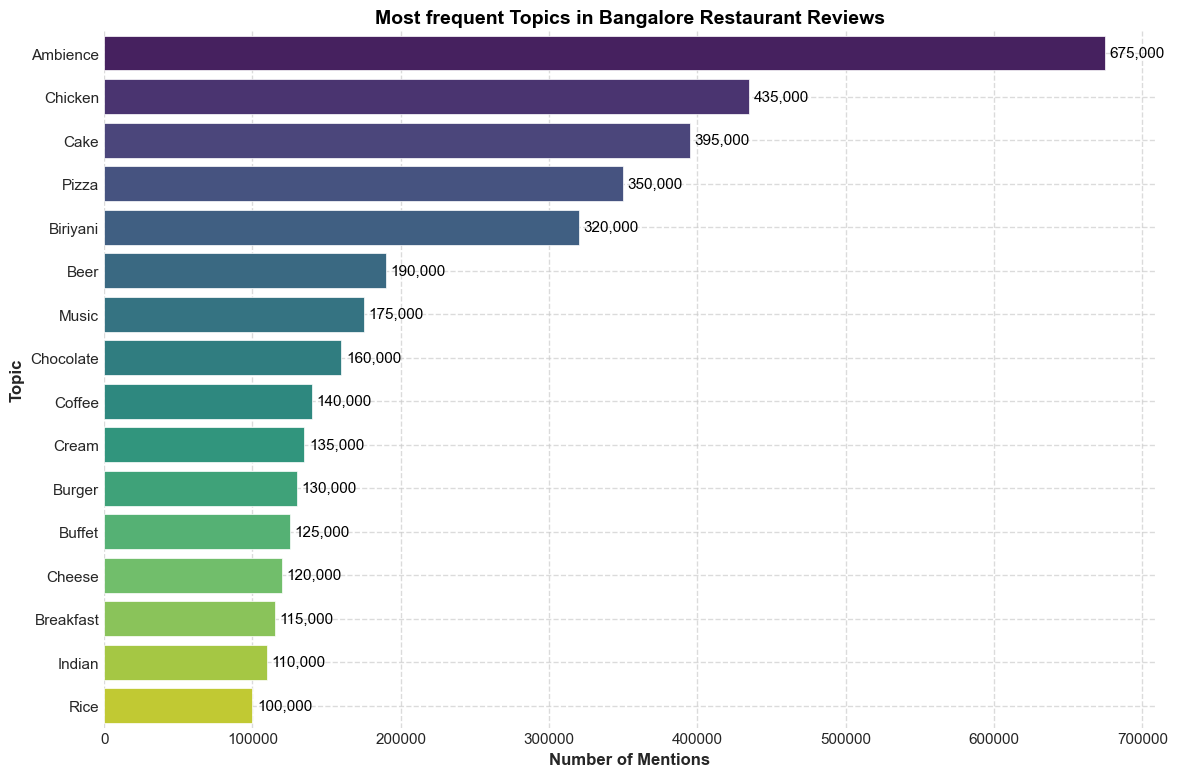

In [253]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data
topics = [
    "Ambience", "Chicken", "Cake", "Pizza", "Biriyani", "Beer", "Music", "Chocolate",
    "Coffee", "Cream", "Burger", "Buffet", "Cheese", "Breakfast", "Indian", "Rice"
]
mentions = [675000, 435000, 395000, 350000, 320000, 190000, 175000, 160000, 
            140000, 135000, 130000, 125000, 120000, 115000, 110000, 100000]

# Create DataFrame
df = pd.DataFrame({"Topic": topics, "Mentions": mentions})

# Sort in descending order
df = df.sort_values(by="Mentions", ascending=False)

# Plot settings
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# Create horizontal bar chart
ax = sns.barplot(x="Mentions", y="Topic", data=df, palette="viridis")

# Remove borders
sns.despine(left=True, bottom=True)  

# Title and labels
plt.title("Most frequent Topics in Bangalore Restaurant Reviews", fontsize=14, fontweight="bold", color="black")
plt.xlabel("Number of Mentions", fontsize=12, fontweight="bold")
plt.ylabel("Topic", fontsize=12, fontweight="bold")
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Add subtle gridlines
plt.grid(axis="x", linestyle="--", alpha=0.7)  # Add subtle gridlines

# Reduce font size of y-axis labels (topics)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11)

# Format numbers & reduce font size of frequency numbers
for index, value in enumerate(df["Mentions"]):
    ax.text(value + 3000, index, f"{value:,}", va='center', fontsize=11, color="black")

# Show plot
# Adjust layout and save the plot
plt.tight_layout()
plt.savefig('/Users/.../Documents/Zomato Analysis/04 - Analysis/topic_ranking.png', bbox_inches="tight", dpi=300, facecolor='white')  # Save as PNG
plt.show()


# 5. Geo

In [77]:
df_zomato_finalanalysis

rate  votes  approx_cost_2ppl                    location  \
0       4.1    775               800                Banashankari   
1       4.1    787               800                Banashankari   
2       3.8    918               800                Banashankari   
3       3.7     88               300                Banashankari   
4       3.8    166               600                Basavanagudi   
...     ...    ...               ...                         ...   
51143   3.6     27              1500                  Whitefield   
51144   3.7      0               600                  Whitefield   
51145   3.7      0              2000                  Whitefield   
51146   4.3    236              2500  ITPL Main Road, Whitefield   
51147   3.4     13              1500  ITPL Main Road, Whitefield   

      listed_in_city            rest_type listed_as_type  \
0       Banashankari        Casual Dining         Buffet   
1       Banashankari        Casual Dining         Buffet   
2       Banashankari  Cafe, Casual Dining         Buffet   
3       Banashankari          Quick Bites         Buffet   
4       Banashankari        Casual Dining         Buffet   
...              ...                  ...            ...   
51143     Whitefield                  Bar  Pubs and bars   
51144     Whitefield                  Bar  Pubs and bars   
51145     Whitefield                  Bar  Pubs and bars   
51146     Whitefield                  Bar  Pubs and bars   
51147     Whitefield   Bar, Casual Dining  Pubs and bars   

                                     cuisines book_table online_order  \
0              North Indian, Mughlai, Chinese        Yes          Yes   
1                 Chinese, North Indian, Thai         No          Yes   
2                      Cafe, Mexican, Italian         No          Yes   
3                  South Indian, North Indian         No           No   
4                    North Indian, Rajasthani         No           No   
...                                       ...        ...          ...   
51143                             Continental         No           No   
51144                             Finger Food         No           No   
51145                             Finger Food         No           No   
51146                             Finger Food        Yes           No   
51147  Finger Food, North Indian, Continental         No           No   

                                            reviews_list  popularity_score  \
0      [('Rated 4.0', 'RATED\n  A beautiful place to ...           31775.0   
1      [('Rated 4.0', 'RATED\n  Had been here for din...           32267.0   
2      [('Rated 3.0', "RATED\n  Ambience is not that ...           34884.0   
3      [('Rated 4.0', "RATED\n  Great food and proper...            3256.0   
4      [('Rated 4.0', 'RATED\n  Very good restaurant ...            6308.0   
...                                                  ...               ...   
51143  [('Rated 5.0', "RATED\n  Food and service are ...             972.0   
51144                                                 []              37.0   
51145                                                 []              37.0   
51146  [('Rated 4.0', 'RATED\n  Nice and friendly pla...           10148.0   
51147  [('Rated 5.0', 'RATED\n  Great ambience , look...             442.0   

                                           clean_reviews  sentiment_score  
0        beautiful place dine inthe interiors take ba...         0.350090  
1        dinner family turned good choose suitable ag...         0.177794  
2        ambience good enough pocket friendly cafe qu...         0.172369  
3        great food proper karnataka style full meals...         0.262419  
4        good restaurant neighbourhood buffet system ...         0.404720  
...                                                  ...              ...  
51143    food service incomparably excellent service ...         0.394217  
51144                                          

In [140]:
# Import ".json" file for Bengaluru
bengaluru_geo = r'/Users/.../Documents/Zomato Analysis/02 - Data/Prepared Data/bengaluru_boundary.geojson'

# https://github.com/datameet/PincodeBoundary/blob/master/Bangalore/boundary.geojson 

In [81]:
# Look at the JSON file contents

f = open(r'/Users/.../Documents/Zomato Analysis/02 - Data/Prepared Data/bengaluru_boundary.geojson',)
  
# returns JSON object asa dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'properties': {'objectid': 203, 'pin_code': 560066, 'area_name': 'WHITE FIELD SO', 'st_area(shape)': 18861683.950284, 'st_length(shape)': 27522.436239, 'created_user': 'posts', 'created_date': '1406713225000', 'last_edited_user': 'posts', 'last_edited_date': '1406713225000', 'name': 'WHITE FIELD SO'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[77.74495913453232, 12.993406628665984], [77.74345709837665, 12.987259522444585], [77.75281068679664, 12.983778183515266], [77.75251027938585, 12.982764091728578], [77.7648854608584, 12.977789490268336], [77.77409941425228, 12.974085169086596], [77.7824685991395, 12.970720123071185], [77.7788173858874, 12.970040540125982], [77.77702715042567, 12.96904591549269], [77.77407523879135, 12.967405835746263], [77.77126428629983, 12.967050358365853], [77.7682387532364, 12.96790768818481], [77.76789543060954, 12.967824045890191], [77.76615735851972, 12.966527595920304], [77.76311036919573, 12.964750195040835], [77.76032087296477,

In [83]:
# create the new column "area_name_location" from location column
df_zomato_finalanalysis['area_name_location'] = df_zomato_finalanalysis['location']

In [85]:
# create the new column "area_name_city" from listed_in_city column
df_zomato_finalanalysis['area_name_city'] = df_zomato_finalanalysis['listed_in_city']

In [87]:
# display all unique values 
dataset_locations = set(df_zomato_finalanalysis['area_name_location'].unique())
dataset_cities = set(df_zomato_finalanalysis['area_name_city'].unique())

In [89]:
dataset_locations

{'BTM',
 'Banashankari',
 'Banaswadi',
 'Bannerghatta Road',
 'Basavanagudi',
 'Basaveshwara Nagar',
 'Bellandur',
 'Bommanahalli',
 'Brigade Road',
 'Brookefield',
 'CV Raman Nagar',
 'Central Bangalore',
 'Church Street',
 'City Market',
 'Commercial Street',
 'Cunningham Road',
 'Domlur',
 'East Bangalore',
 'Ejipura',
 'Electronic City',
 'Frazer Town',
 'HBR Layout',
 'HSR',
 'Hebbal',
 'Hennur',
 'Hosur Road',
 'ITPL Main Road, Whitefield',
 'Indiranagar',
 'Infantry Road',
 'JP Nagar',
 'Jakkur',
 'Jalahalli',
 'Jayanagar',
 'Jeevan Bhima Nagar',
 'KR Puram',
 'Kaggadasapura',
 'Kalyan Nagar',
 'Kammanahalli',
 'Kanakapura Road',
 'Kengeri',
 'Koramangala',
 'Koramangala 1st Block',
 'Koramangala 2nd Block',
 'Koramangala 3rd Block',
 'Koramangala 4th Block',
 'Koramangala 5th Block',
 'Koramangala 6th Block',
 'Koramangala 7th Block',
 'Koramangala 8th Block',
 'Kumaraswamy Layout',
 'Langford Town',
 'Lavelle Road',
 'MG Road',
 'Magadi Road',
 'Majestic',
 'Malleshwaram',
 'M

In [91]:
dataset_cities

{'BTM',
 'Banashankari',
 'Bannerghatta Road',
 'Basavanagudi',
 'Bellandur',
 'Brigade Road',
 'Brookefield',
 'Church Street',
 'Electronic City',
 'Frazer Town',
 'HSR',
 'Indiranagar',
 'JP Nagar',
 'Jayanagar',
 'Kalyan Nagar',
 'Kammanahalli',
 'Koramangala 4th Block',
 'Koramangala 5th Block',
 'Koramangala 6th Block',
 'Koramangala 7th Block',
 'Lavelle Road',
 'MG Road',
 'Malleshwaram',
 'Marathahalli',
 'New BEL Road',
 'Old Airport Road',
 'Rajajinagar',
 'Residency Road',
 'Sarjapur Road',
 'Whitefield'}

In [93]:
# Create a data frame with just the area_names and the popularity_score

data_to_plot_location = df_zomato_finalanalysis[['area_name_location','popularity_score']]
data_to_plot_location.head()

area_name_location  popularity_score
0       Banashankari           31775.0
1       Banashankari           32267.0
2       Banashankari           34884.0
3       Banashankari            3256.0
4       Basavanagudi            6308.0

In [95]:
import folium

# Setup a folium map at a high-level zoom
map = folium.Map(location=[12.9716, 77.5946], zoom_start=11)  # Bengaluru coordinates

# Choropleth maps bind Pandas DataFrames and GeoJSON geometries
folium.Choropleth(
    geo_data=bengaluru_geo, 
    data=data_to_plot_location,
    columns=["area_name_location", "popularity_score"],
    key_on="feature.properties.area_name",
    fill_color="YlOrBr", 
    fill_opacity=0.6, 
    line_opacity=0.1,
    legend_name="Popularity (Rating & Number of Votes)"
).add_to(map)

folium.LayerControl().add_to(map)

map

## **Interpretation**

Here's a comparison of area_name_location and geoJSON area_name:

### Exact Matches:
1. Bannerghatta Road
2. Bommanahalli
3. Frazer Town
4. HS Layout (HSR Layout in Data Set Location vs HSR Layout in Data Set Geo)
5. Indiranagar
6. Jalahalli
7. Koramangala
8. Malleshwaram (MALLESHWARAM GOOD)
9. Nagarbhavi
10. Marathahalli (marathahalli colony)
11. Peenya
12. Rajajinagar
13. RT Nagar (RT Nagar in Data Set Location vs RT NAGAR in Data Set Geo)
14. Sadashiv Nagar (SADASHIVANAGAR SO)
15. Thippasandra (NEW THIPPASANDRA in Data Set Geo)
16. Whitefield (WHITE FIELD SO)
17. Wilson Garden
18. Yelahanka (YELAHANKA POST OFFICE)
19. Yeshwantpur (YESHWANTHPUR PO)

### Potential Matches (Different Spelling/Variants):
1. Bellandur (BELLANDUR POST OFFICE)
2. Banashankari (BSK II stage (good), Banashankari III stage PO)
3. Basavanagudi (Basavanagudi HO)
4. Jayanagar (Jay nagar 3rd block, good jayanagar ho)
5. Krishnarajapuram (krishnarajapuram po)
6. Kalyan Nagar (KALYAN NAGARA PO)
7. Seshadripuram (SESHADRIPURAM GOOD)
8. Magadi Road (Magadi Road SO (Good))

### Observations:
- There are several places in the Data Set Geo that might represent specific post offices or stages, often with different spellings or not entirely matching names, which can make them potential matches.
- The Data Set Geo includes additional context like "PO" (Post Office) or "(Good)" which might indicate specific locations within the general areas listed in the Data Set Location.
- Some names are slightly different due to capitalization or abbreviations, but they likely represent the same general neighborhood or area. 

In [97]:
# Create a data frame with just the area_names and the popularity_score

data_to_plot_city = df_zomato_finalanalysis[['area_name_city','popularity_score']]
data_to_plot_city.head()

area_name_city  popularity_score
0   Banashankari           31775.0
1   Banashankari           32267.0
2   Banashankari           34884.0
3   Banashankari            3256.0
4   Banashankari            6308.0

In [99]:
import folium

# Setup a folium map at a high-level zoom
map = folium.Map(location=[12.9716, 77.5946], zoom_start=11)  # Bengaluru coordinates

# Choropleth maps bind Pandas DataFrames and GeoJSON geometries
folium.Choropleth(
    geo_data=bengaluru_geo, 
    data=data_to_plot_city,
    columns=["area_name_city", "popularity_score"],
    key_on="feature.properties.area_name",
    fill_color="YlOrBr", 
    fill_opacity=0.6, 
    line_opacity=0.1,
    legend_name="Popularity (Rating & Number of Votes)"
).add_to(map)

folium.LayerControl().add_to(map)

map

In [103]:
# Look at unique areas in the geoJSON

import json

# Load the GeoJSON file
with open(r'/Users/.../Documents/Zomato Analysis/02 - Data/Prepared Data/bengaluru_boundary.geojson', encoding="utf-8") as file:
    data = json.load(file)

# Extract unique area names
unique_area_names = set(feature["properties"]["area_name"] for feature in data["features"])

# Print the results
print(unique_area_names)

{'VIMANAPURA', 'ELECTRONIC CITY PO', 'marathahalli colony', 'Magadi Road SO (Good)', 'kumbalagodu po', 'H K P Road', 'BELLANDUR POST OFFICE', 'Bannerghatta Road', 'Bommasandra Industrial area', 'indiranagar', 'VIRGO NAGAR', 'St.Thomas Town S.O', 'Nayandahalli', 'Jigani SO', 'DR College', 'ARBIC COLLEGE POST OFFICE', 'H A FORM POST OFFICE', 'Rajarajeshwari Nagar PO', 'J P Nagar PO', 'JALAHALLI HO', 'SHIVARAM KARANTH NAGAR PO', 'G K V K POST OFFICE', 'viveknagar', 'Bommanahalli PO', 'Bangalore Vishwavidyalaya', 'MALLESHWARAM WEST PO GOOD', 'Nagarbhavi SO (Good)', 'BIAL SO', 'HAL II STAGE HO', 'YELAHANKA POST OFFICE', 'D K Sandra PO', 'Achitnagar', 'YESHWANTHPUR PO', 'Rajajinagar Ho new Good', 'Wilson garden', 'Jay nagar 3rd block', 'subramanyapura', 'good koramangla VI Bk 560095', 'agram', 'Anjanapura SO', 'krishnarajapuram po', 'CHIKKABANAVARA', 'DASARAHALLI PO', 'SESHADRIPURAM GOOD', 'HESARAGHATTA', 'JC NAGAR', 'BSK 1st stage', 'Chamarajpet Good', 'NANDINI LAYOUT GOOD', 'FRAZER TOWN', 

## **Interpretation**

Here's a comparison between the two provided datasets:

### Exact Matches:
1. Bannerghatta Road
2. Electronic City (Electronic City PO in Data Set Geo)
3. Frazer Town (FRAZER TOWN)
4. Indiranagar (indiranagar)
5. Malleshwaram (MALLESHWARAM GOOD, MALLESHWARAM WEST PO GOOD)
6. Marathahalli (marathahalli colony)
7. Rajajinagar (Rajajinagar Ho new Good)
8. Whitefield (WHITE FIELD SO)

### Potential Matches (Different Spelling/Variants):
1. Bellandur (BELLANDUR POST OFFICE)
2. Banashankari (Banashankari III stage PO, BSK II stage (good))
3. HSR (HSR Layout)
4. JP Nagar (J P Nagar PO)
5. Jayanagar (Jay nagar 3rd block, good jayanagar ho)
6. Kalyan Nagar (KALYAN NAGARA PO)
7. Koramangala 4th Block, Koramangala 5th Block, Koramangala 6th Block, Koramangala 7th Block (Koramangala po, good koramangla VI Bk 560095)
8. Basavanagudi (Basavanagudi HO)
9. Residency Road (MUSEUM ROAD S.O., possible variant related to location)
10. Lavelle Road (Sivan Chetty Gargens, possible variant related to location)
11. MG Road (KG Road PO (Good), possible reference to area street)

### Observations:
- The Data Set Geo dataset includes additional context related to post offices or stages that do not appear in the Data Set City, and some locations are referenced with slightly different naming conventions.
- Please note that some potential matches are inferred based on variants and abbreviations which may refer to similar but not identical locations or related areas.

In [114]:
# update the "area_name_location" column in df_zomato_finalanalysis to replace the instances that contain the string "ITPL MAIN ROAD, WHITEFIELD" with just "Whitefield"
df_zomato_finalanalysis.loc[df_zomato_finalanalysis["area_name_location"].str.contains("ITPL Main Road, Whitefield", case=False, na=False), "area_name_location"] = "Whitefield"

In [116]:
# update the "area_name_location" column in df_zomato_finalanalysis to replace the instances that contain the string "Varthur Main Road, Whitefield" with just "Whitefield"
df_zomato_finalanalysis.loc[df_zomato_finalanalysis["area_name_location"].str.contains("Varthur Main Road, Whitefield", case=False, na=False), "area_name_location"] = "Whitefield"

In [118]:
# update the "area_name_location" column in df_zomato_finalanalysis to replace the instances that contain the string "Koramangala 1st Block" with just ""Koramangala"
df_zomato_finalanalysis.loc[df_zomato_finalanalysis["area_name_location"].str.contains("Koramangala 1st Block", case=False, na=False), "area_name_location"] = "Koramangala"

In [120]:
# update the "area_name_location" column in df_zomato_finalanalysis to replace the instances that contain the string "Koramangala 1st Block" with just ""Koramangala"
df_zomato_finalanalysis.loc[df_zomato_finalanalysis["area_name_location"].str.contains("Koramangala 2nd Block", case=False, na=False), "area_name_location"] = "Koramangala"

In [122]:
# update the "area_name_location" column in df_zomato_finalanalysis to replace the instances that contain the string "Koramangala 1st Block" with just ""Koramangala"
df_zomato_finalanalysis.loc[df_zomato_finalanalysis["area_name_location"].str.contains("Koramangala 3rd Block", case=False, na=False), "area_name_location"] = "Koramangala"

In [124]:
# update the "area_name_location" column in df_zomato_finalanalysis to replace the instances that contain the string "Koramangala 1st Block" with just ""Koramangala"
df_zomato_finalanalysis.loc[df_zomato_finalanalysis["area_name_location"].str.contains("Koramangala 4th Block", case=False, na=False), "area_name_location"] = "Koramangala"

In [126]:
# update the "area_name_location" column in df_zomato_finalanalysis to replace the instances that contain the string "Koramangala 1st Block" with just ""Koramangala"
df_zomato_finalanalysis.loc[df_zomato_finalanalysis["area_name_location"].str.contains("Koramangala 5th Block", case=False, na=False), "area_name_location"] = "Koramangala"

In [128]:
# update the "area_name_location" column in df_zomato_finalanalysis to replace the instances that contain the string "Koramangala 1st Block" with just ""Koramangala"
df_zomato_finalanalysis.loc[df_zomato_finalanalysis["area_name_location"].str.contains("Koramangala 6th Block", case=False, na=False), "area_name_location"] = "Koramangala"

In [130]:
# update the "area_name_location" column in df_zomato_finalanalysis to replace the instances that contain the string "Koramangala 1st Block" with just ""Koramangala"
df_zomato_finalanalysis.loc[df_zomato_finalanalysis["area_name_location"].str.contains("Koramangala 7th Block", case=False, na=False), "area_name_location"] = "Koramangala"

In [132]:
# update the "area_name_location" column in df_zomato_finalanalysis to replace the instances that contain the string "Koramangala 1st Block" with just ""Koramangala"
df_zomato_finalanalysis.loc[df_zomato_finalanalysis["area_name_location"].str.contains("Koramangala 8th Block", case=False, na=False), "area_name_location"] = "Koramangala"

In [134]:
# display all unique values 
dataset_locations = set(df_zomato_finalanalysis['area_name_location'].unique())

In [136]:
dataset_locations

{'BTM',
 'Banashankari',
 'Banaswadi',
 'Bannerghatta Road',
 'Basavanagudi',
 'Basaveshwara Nagar',
 'Bellandur',
 'Bommanahalli',
 'Brigade Road',
 'Brookefield',
 'CV Raman Nagar',
 'Central Bangalore',
 'Church Street',
 'City Market',
 'Commercial Street',
 'Cunningham Road',
 'Domlur',
 'East Bangalore',
 'Ejipura',
 'Electronic City',
 'Frazer Town',
 'HBR Layout',
 'HSR',
 'Hebbal',
 'Hennur',
 'Hosur Road',
 'Indiranagar',
 'Infantry Road',
 'JP Nagar',
 'Jakkur',
 'Jalahalli',
 'Jayanagar',
 'Jeevan Bhima Nagar',
 'KR Puram',
 'Kaggadasapura',
 'Kalyan Nagar',
 'Kammanahalli',
 'Kanakapura Road',
 'Kengeri',
 'Koramangala',
 'Kumaraswamy Layout',
 'Langford Town',
 'Lavelle Road',
 'MG Road',
 'Magadi Road',
 'Majestic',
 'Malleshwaram',
 'Marathahalli',
 'Mysore Road',
 'Nagarbhavi',
 'Nagawara',
 'New BEL Road',
 'North Bangalore',
 'Old Airport Road',
 'Old Madras Road',
 'Peenya',
 'RT Nagar',
 'Race Course Road',
 'Rajajinagar',
 'Rajarajeshwari Nagar',
 'Rammurthy Nagar

In [142]:
# Import ".json" file for Bengaluru
bengaluru_geo2 = r'/Users/.../Documents/Zomato Analysis/02 - Data/Prepared Data/bengaluru_boundary_final.geojson'

In [144]:
# Create a data frame with just the area_names and the popularity_score

data_to_plot_location2 = df_zomato_finalanalysis[['area_name_location','popularity_score']]
data_to_plot_location2.head()

area_name_location  popularity_score
0       Banashankari           31775.0
1       Banashankari           32267.0
2       Banashankari           34884.0
3       Banashankari            3256.0
4       Basavanagudi            6308.0

In [146]:
import folium

# Setup a folium map at a high-level zoom
map = folium.Map(location=[12.9716, 77.5946], zoom_start=11)  # Bengaluru coordinates

# Choropleth maps bind Pandas DataFrames and GeoJSON geometries
folium.Choropleth(
    geo_data=bengaluru_geo2, 
    data=data_to_plot_location2,
    columns=["area_name_location", "popularity_score"],
    key_on="feature.properties.area_name",
    fill_color="YlOrBr", 
    fill_opacity=0.6, 
    line_opacity=0.1,
    legend_name="Popularity (Rating & Number of Votes)"
).add_to(map)

folium.LayerControl().add_to(map)

map

In [148]:
# Create a data frame with just the area_names and the popularity_score

data_to_plot_location3 = df_zomato_finalanalysis[['area_name_location','rate']]
data_to_plot_location3.head()

area_name_location  rate
0       Banashankari   4.1
1       Banashankari   4.1
2       Banashankari   3.8
3       Banashankari   3.7
4       Basavanagudi   3.8

In [150]:
import folium

# Setup a folium map at a high-level zoom
map = folium.Map(location=[12.9716, 77.5946], zoom_start=11)  # Bengaluru coordinates

# Choropleth maps bind Pandas DataFrames and GeoJSON geometries
folium.Choropleth(
    geo_data=bengaluru_geo2, 
    data=data_to_plot_location3,
    columns=["area_name_location", "rate"],
    key_on="feature.properties.area_name",
    fill_color="YlOrBr", 
    fill_opacity=0.6, 
    line_opacity=0.1,
    legend_name="Restaurant Rating"
).add_to(map)

folium.LayerControl().add_to(map)

map

In [152]:
df_zomato_finalanalysis

rate  votes  approx_cost_2ppl                    location  \
0       4.1    775               800                Banashankari   
1       4.1    787               800                Banashankari   
2       3.8    918               800                Banashankari   
3       3.7     88               300                Banashankari   
4       3.8    166               600                Basavanagudi   
...     ...    ...               ...                         ...   
51143   3.6     27              1500                  Whitefield   
51144   3.7      0               600                  Whitefield   
51145   3.7      0              2000                  Whitefield   
51146   4.3    236              2500  ITPL Main Road, Whitefield   
51147   3.4     13              1500  ITPL Main Road, Whitefield   

      listed_in_city            rest_type listed_as_type  \
0       Banashankari        Casual Dining         Buffet   
1       Banashankari        Casual Dining         Buffet   
2       Banashankari  Cafe, Casual Dining         Buffet   
3       Banashankari          Quick Bites         Buffet   
4       Banashankari        Casual Dining         Buffet   
...              ...                  ...            ...   
51143     Whitefield                  Bar  Pubs and bars   
51144     Whitefield                  Bar  Pubs and bars   
51145     Whitefield                  Bar  Pubs and bars   
51146     Whitefield                  Bar  Pubs and bars   
51147     Whitefield   Bar, Casual Dining  Pubs and bars   

                                     cuisines book_table online_order  \
0              North Indian, Mughlai, Chinese        Yes          Yes   
1                 Chinese, North Indian, Thai         No          Yes   
2                      Cafe, Mexican, Italian         No          Yes   
3                  South Indian, North Indian         No           No   
4                    North Indian, Rajasthani         No           No   
...                                       ...        ...          ...   
51143                             Continental         No           No   
51144                             Finger Food         No           No   
51145                             Finger Food         No           No   
51146                             Finger Food        Yes           No   
51147  Finger Food, North Indian, Continental         No           No   

                                            reviews_list  popularity_score  \
0      [('Rated 4.0', 'RATED\n  A beautiful place to ...           31775.0   
1      [('Rated 4.0', 'RATED\n  Had been here for din...           32267.0   
2      [('Rated 3.0', "RATED\n  Ambience is not that ...           34884.0   
3      [('Rated 4.0', "RATED\n  Great food and proper...            3256.0   
4      [('Rated 4.0', 'RATED\n  Very good restaurant ...            6308.0   
...                                                  ...               ...   
51143  [('Rated 5.0', "RATED\n  Food and service are ...             972.0   
51144                                                 []              37.0   
51145                                                 []              37.0   
51146  [('Rated 4.0', 'RATED\n  Nice and friendly pla...           10148.0   
51147  [('Rated 5.0', 'RATED\n  Great ambience , look...             442.0   

                                           clean_reviews  sentiment_score  \
0        beautiful place dine inthe interiors take ba...         0.350090   
1        dinner family turned good choose suitable ag...         0.177794   
2        ambience good enough pocket friendly cafe qu...         0.172369   
3        great food proper karnataka style full meals...         0.262419   
4        good restaurant neighbourhood buffet system ...         0.404720   
...                                                  ...              ...   
51143    food service incomparably excellent service ...         0.394217   
51144                                  

In [156]:
# subset relevant columns into a final cleaned data frame for export and import into Tableau Public

df_zomato_tableau = df_zomato_finalanalysis[
    [
        "rate",
        "votes",
        "popularity_score",
        "sentiment_score",
        "approx_cost_2ppl",
        "rest_type",
        "listed_as_type",
        "cuisines",
        "book_table",
        "online_order",
        "clean_reviews",
        "area_name_location",
    ]
].copy()

In [158]:
# save out subset out for Tableau
df_zomato_tableau.to_csv(os.path.join(r'/Users/.../Documents/Zomato Analysis/02 - Data/Prepared Data/zomato_tableau.csv'))